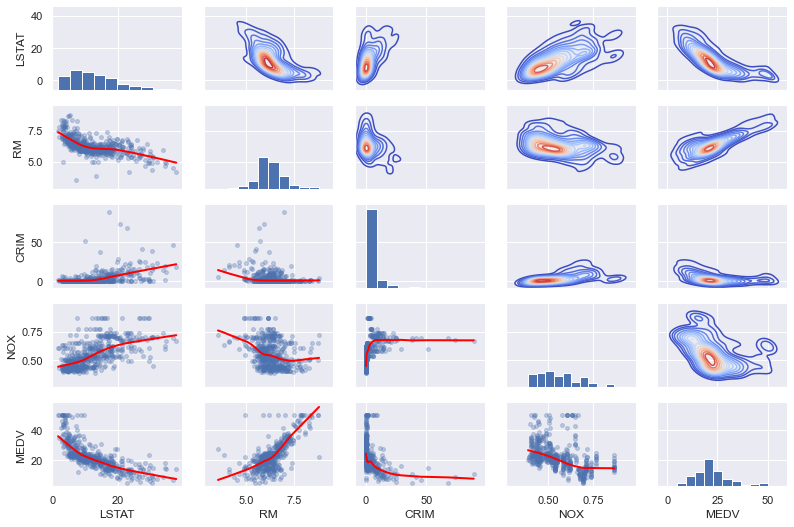

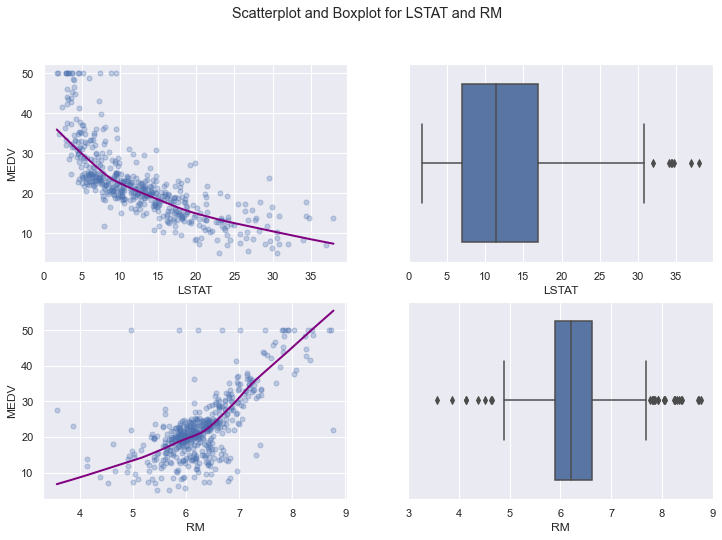

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

boston = load_boston()

bos = pd.DataFrame(boston.data, columns=boston.feature_names)

bos['MEDV'] = boston.target

# set the size of the figure
sns.set(rc={'figure.figsize':(12, 8)})

g = sns.PairGrid(bos, vars=['LSTAT', 'RM', 'CRIM', 'NOX', 'MEDV'], height=1.5, aspect=1.5)
g = g.map_diag(plt.hist)
g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
                line_kws={'color':'red', 'linewidth': 2})
g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
plt.show()

fig, axes = plt.subplots(2, 2)
fig.suptitle("Scatterplot and Boxplot for LSTAT and RM")

sns.regplot(x=bos['LSTAT'], y=bos['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[0, 0])

sns.boxplot(x=bos['LSTAT'], ax=axes[0, 1])

sns.regplot(x=bos['RM'], y=bos['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[1, 0])

sns.boxplot(x=bos['RM'], ax=axes[1, 1]).set(xlim=(3, 9))

plt.show()


In [2]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM'], bos['CRIM'], bos['NOX']], columns=['LSTAT', 'RM', 'CRIM', 'NOX'])
Y = bos['MEDV']

print(X.shape)
print(Y.shape)

# splits the training and test data set in 70% : 30%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(506, 4)
(506,)
(354, 4)
(152, 4)
(354,)
(152,)


In [3]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

# model evaluation for training set
y_train_predict = lm.predict(X_train)

# plt.plot(np.unique(Y_train), np.poly1d(np.polyfit(Y_train, y_train_predict, 1))(np.unique(Y_train)), 
#         linewidth=2, color='r')

# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(Y_train, y_train_predict, 1)

Linear Regression coefficients: [-0.54508378  5.5228769  -0.12942764 -1.50751444]
Linear Regression intercept: -4.04100571086504


C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


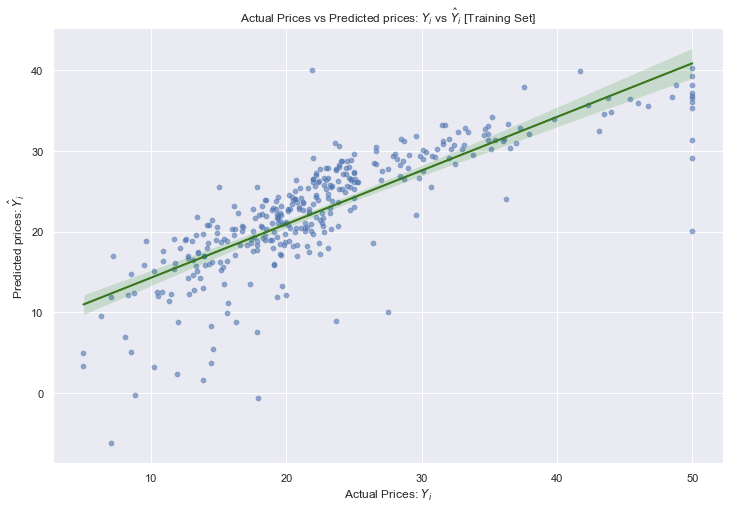

In [4]:
sns.scatterplot(Y_train, y_train_predict, alpha=0.4)
sns.regplot(Y_train, y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(np.unique(Y_train), np.unique(np.poly1d(b + m * np.unique(Y_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

In [5]:
y_test_predict = lm.predict(X_test)

In [7]:
for i in range(8):
    print("Vlera e parashikuar = ", y_test_predict[i])
    print("Vlera e vertete = ", Y_test.array[i])
    print()

Vlera e parashikuar =  26.23229942118792
Vlera e vertete =  22.6

Vlera e parashikuar =  22.948392342834698
Vlera e vertete =  50.0

Vlera e parashikuar =  24.588989071381903
Vlera e vertete =  23.0

Vlera e parashikuar =  10.469823682483362
Vlera e vertete =  8.3

Vlera e parashikuar =  22.985138034436286
Vlera e vertete =  21.2

Vlera e parashikuar =  22.67035416499485
Vlera e vertete =  19.9

Vlera e parashikuar =  20.825622893045978
Vlera e vertete =  20.6

Vlera e parashikuar =  23.071364315183843
Vlera e vertete =  18.7



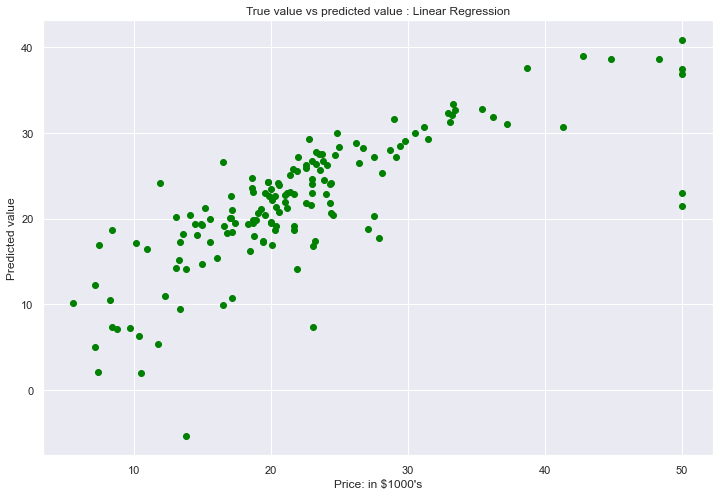

In [9]:
plt.scatter(Y_test, y_test_predict, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [10]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, Y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

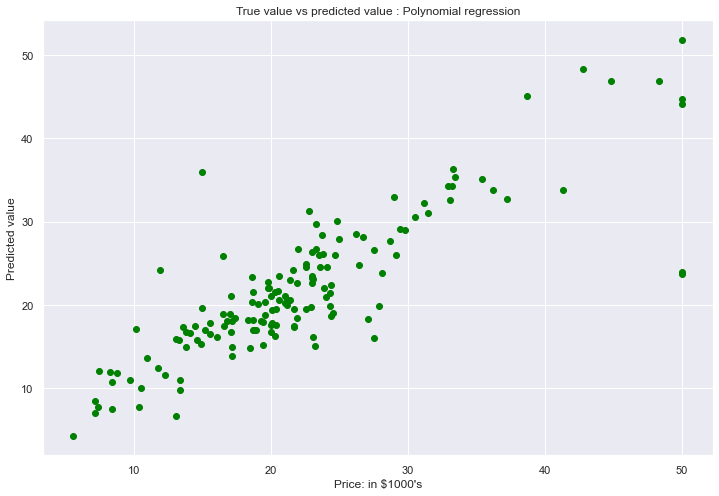

In [30]:
plt.scatter(Y_test, y_test_predicted, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Polynomial regression")
plt.show()

In [29]:
polyreg = 0
linreg = 0
for i in range(152):
    if (y_test_predicted[i] - y_test_predict[i])<0:
        polyreg += 1
    else:
        linreg += 1
print(polyreg , linreg)

99 53
